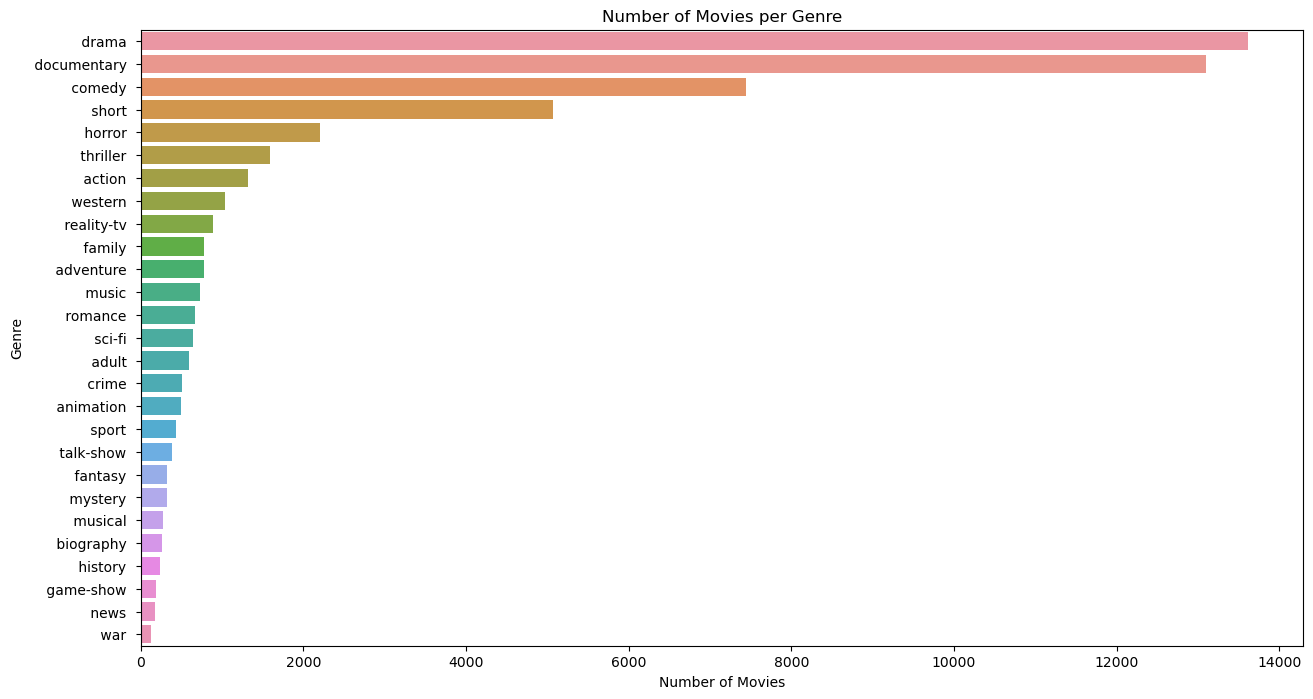

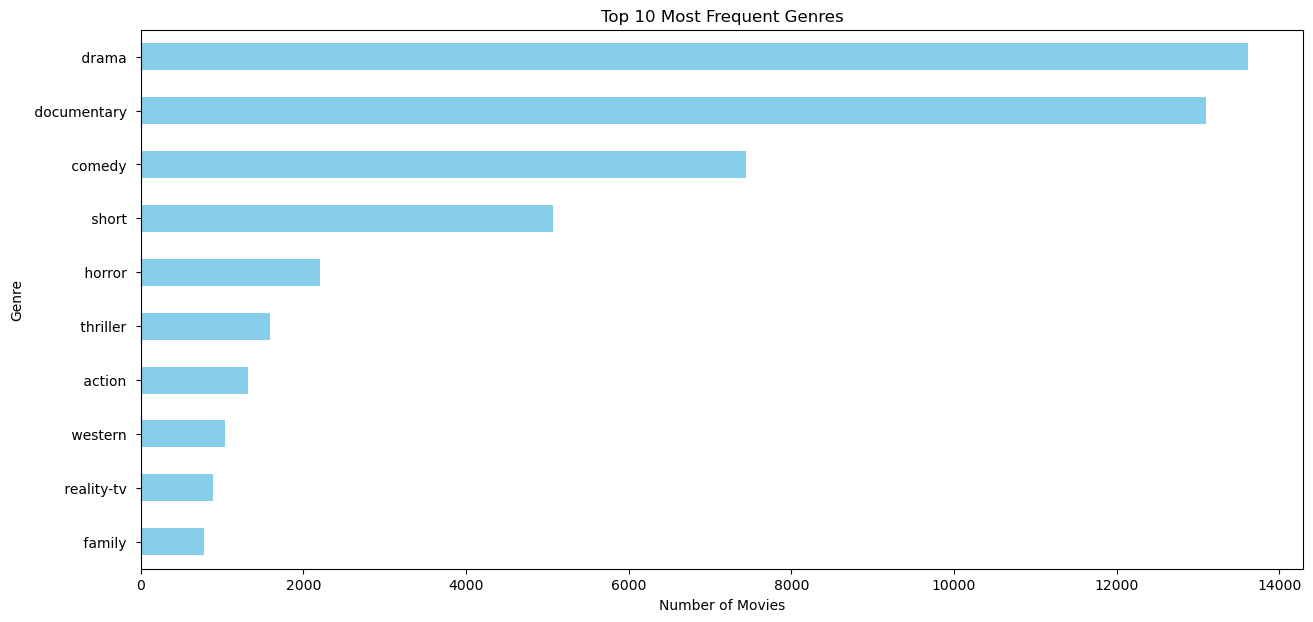

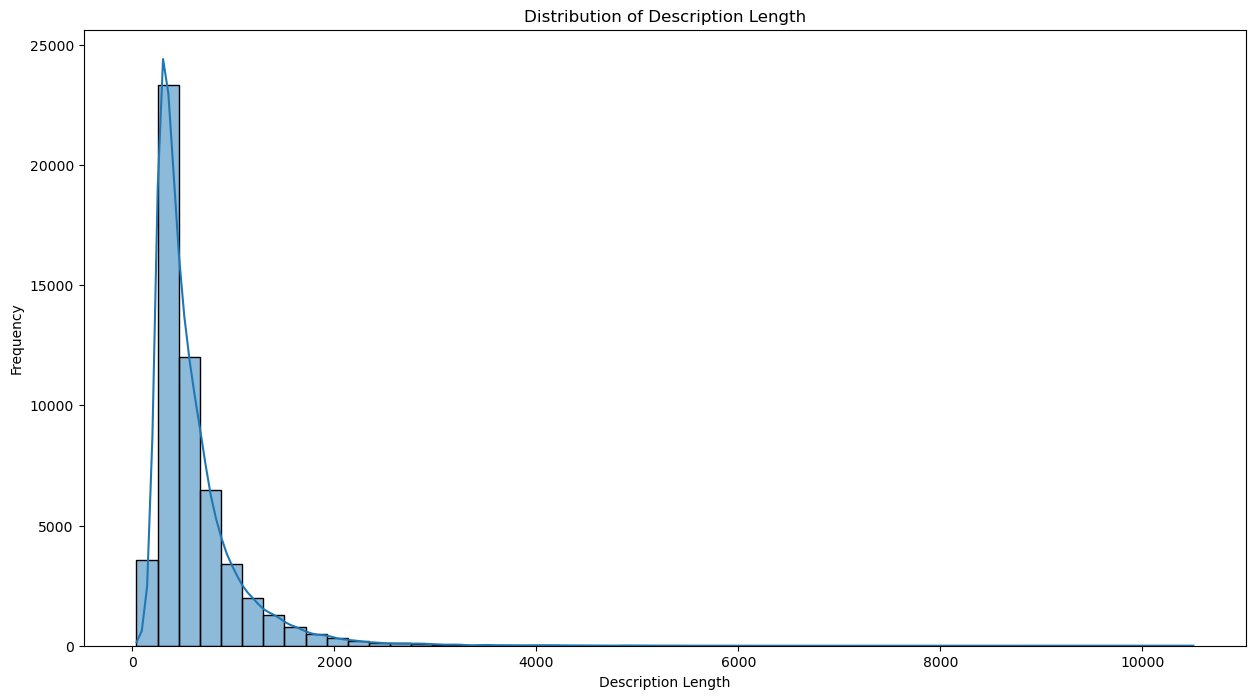

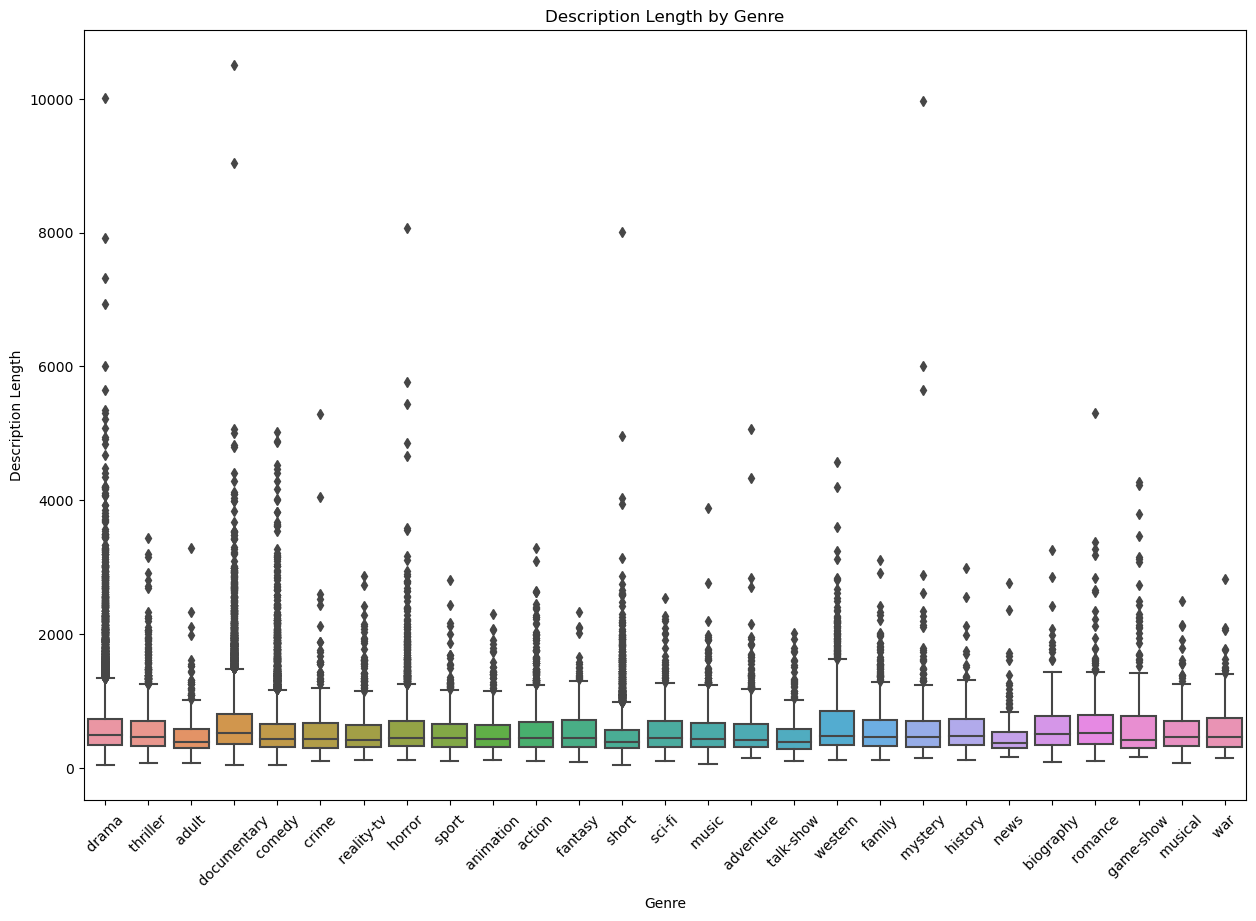

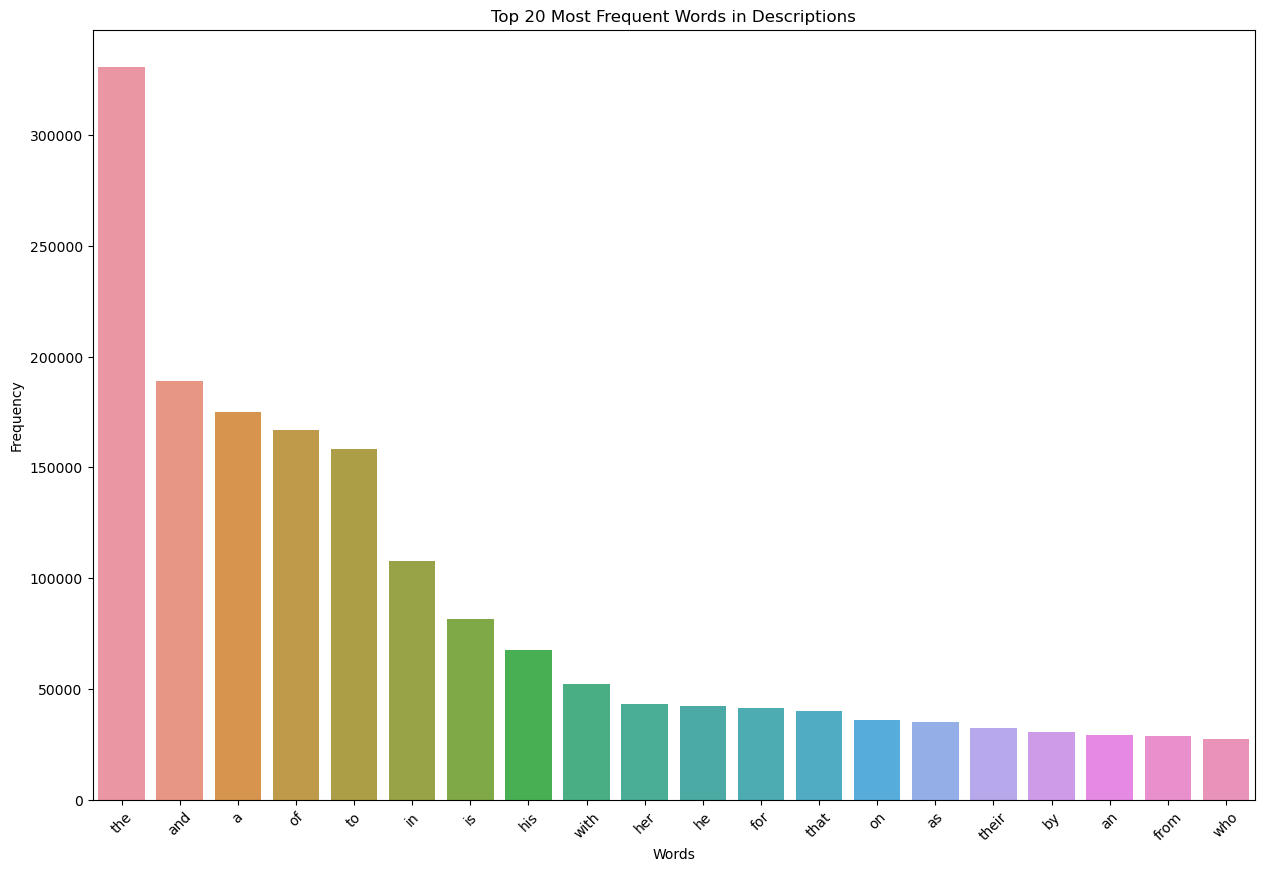

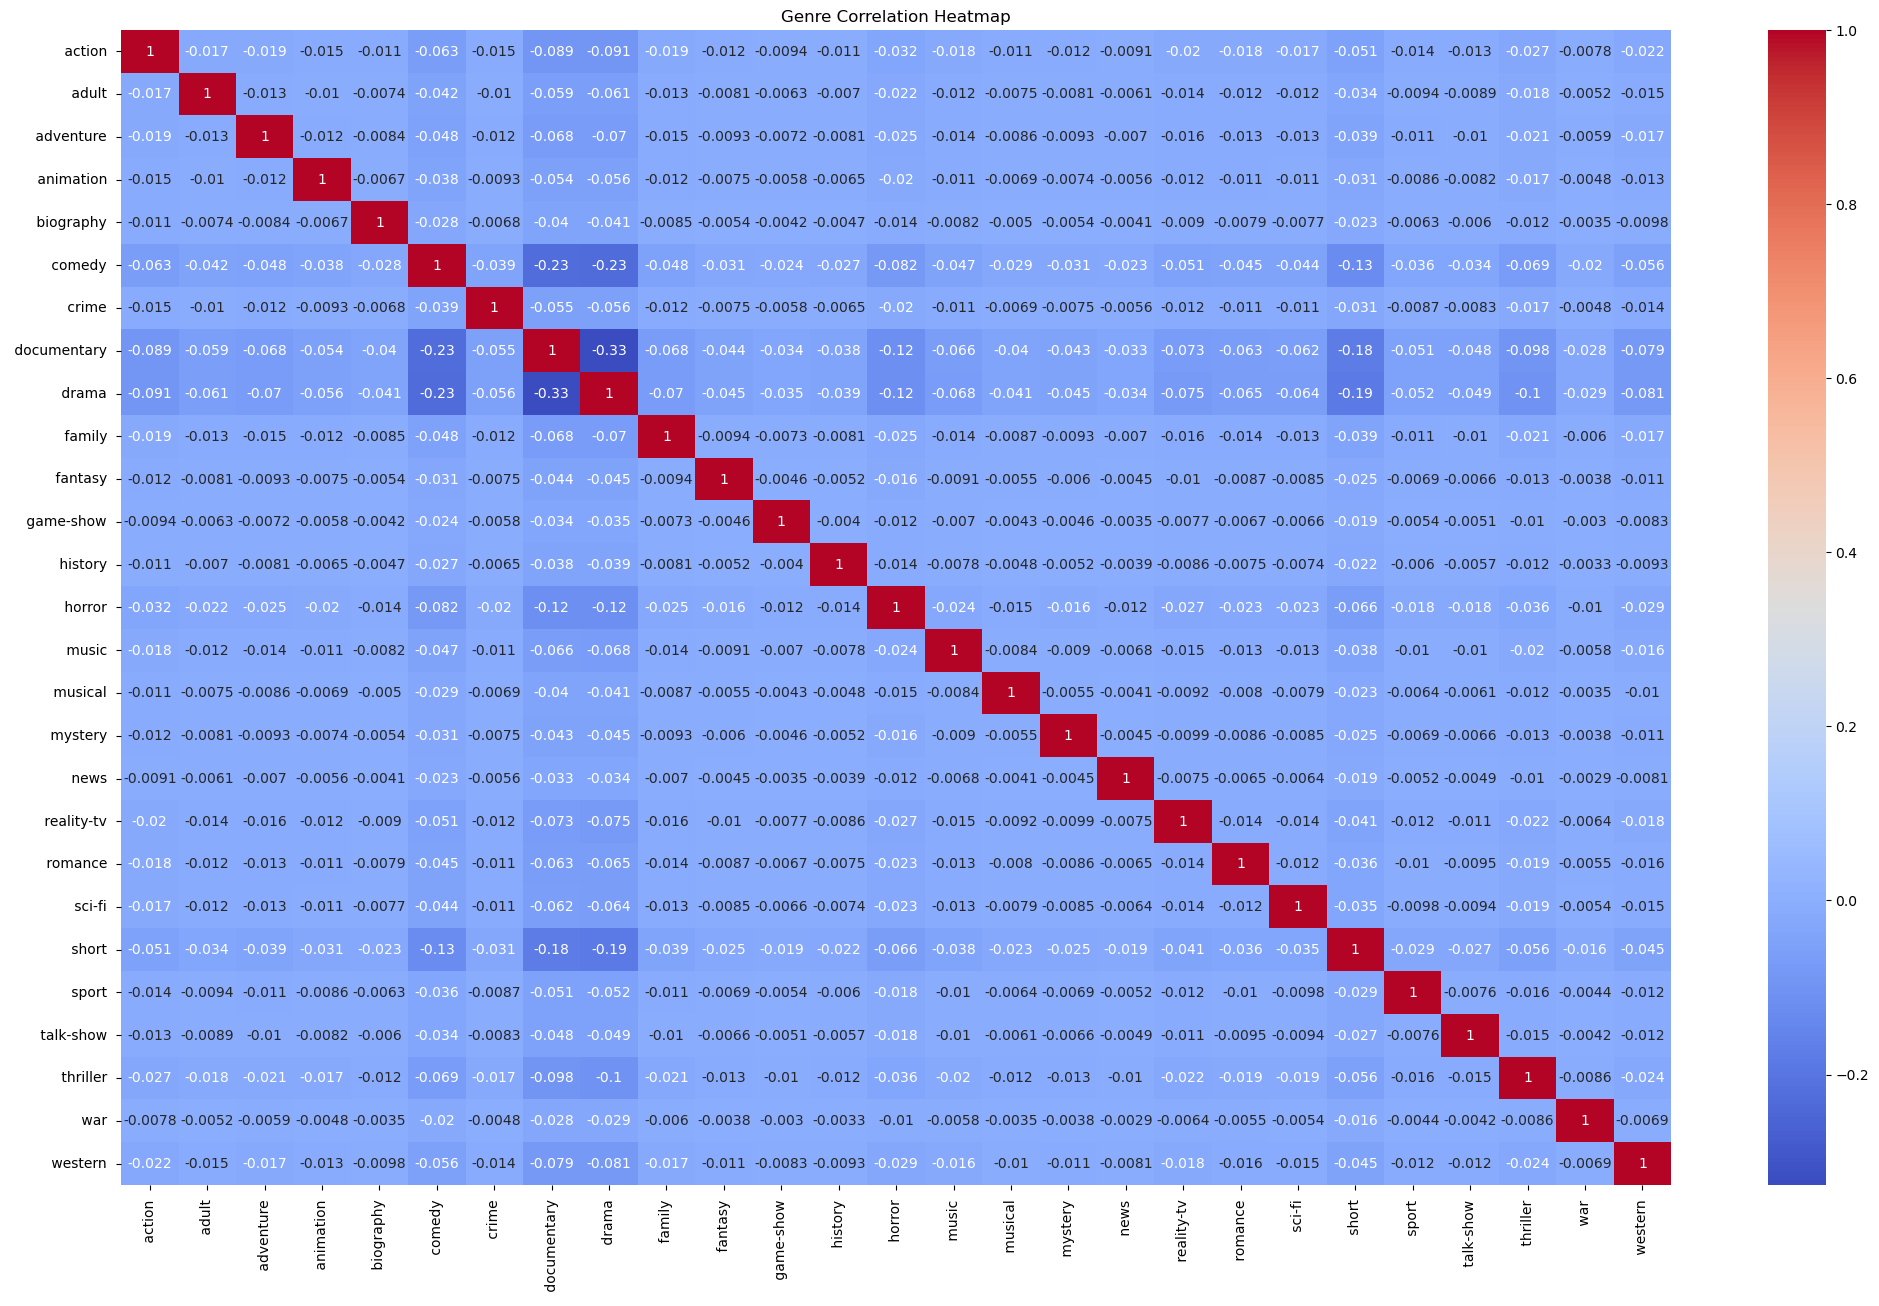

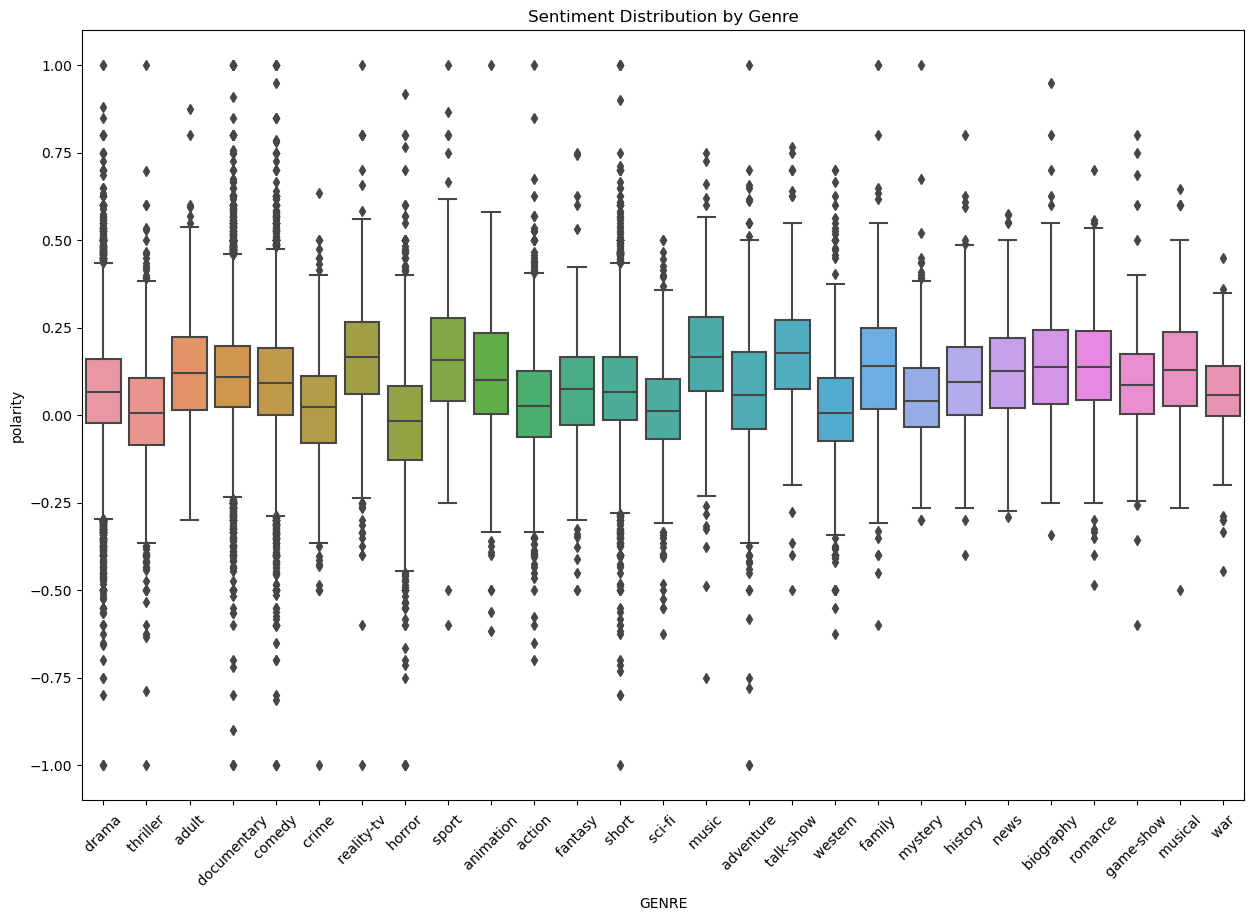

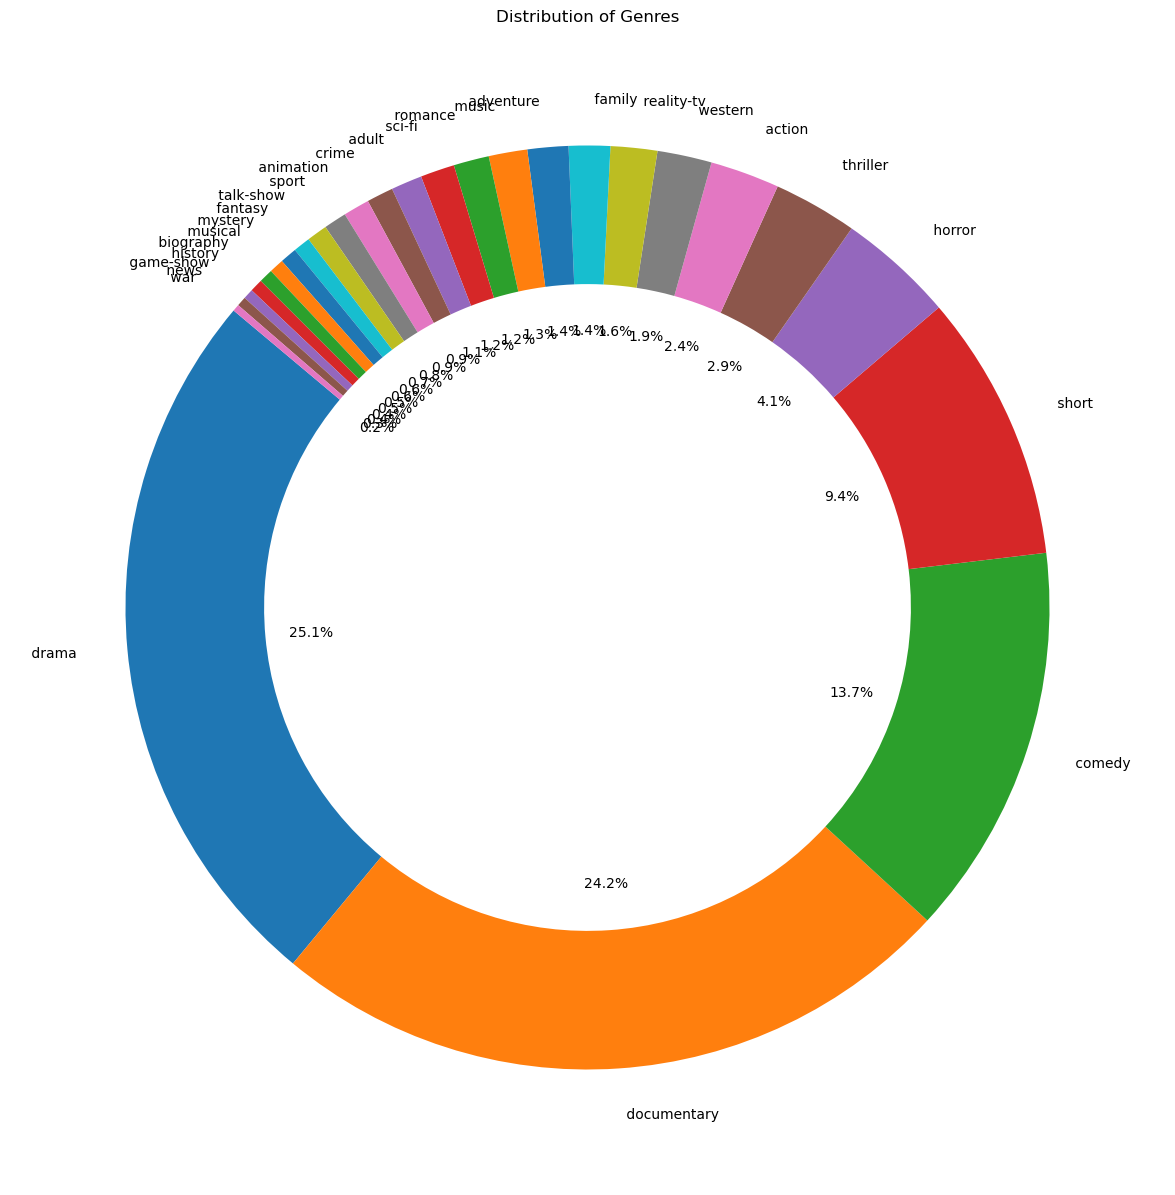

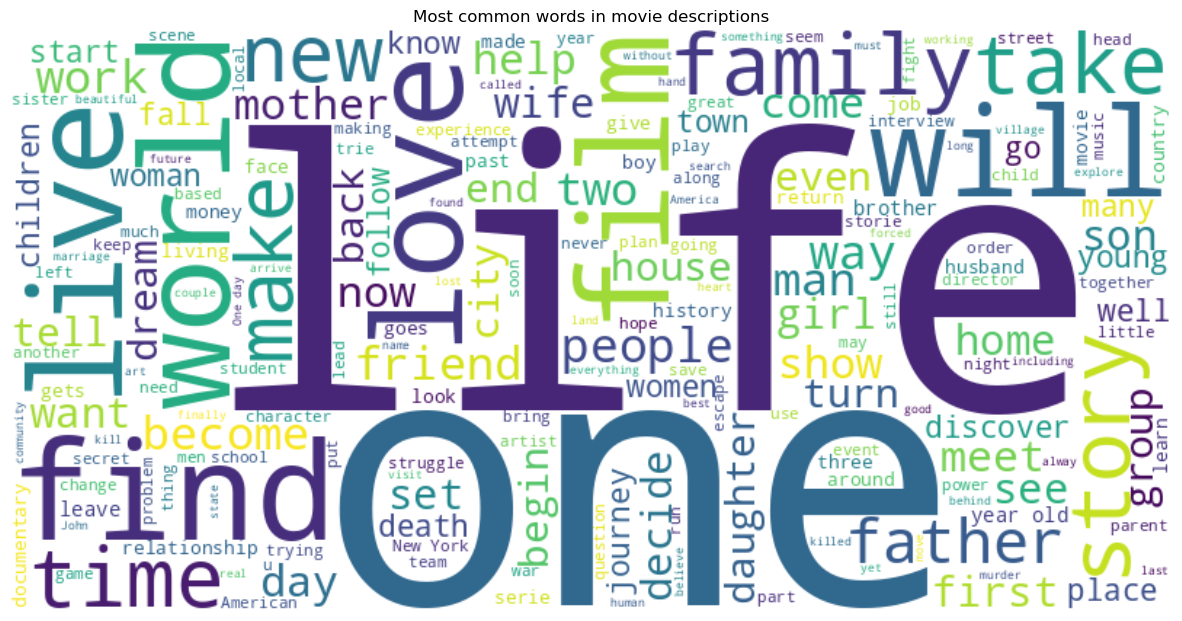

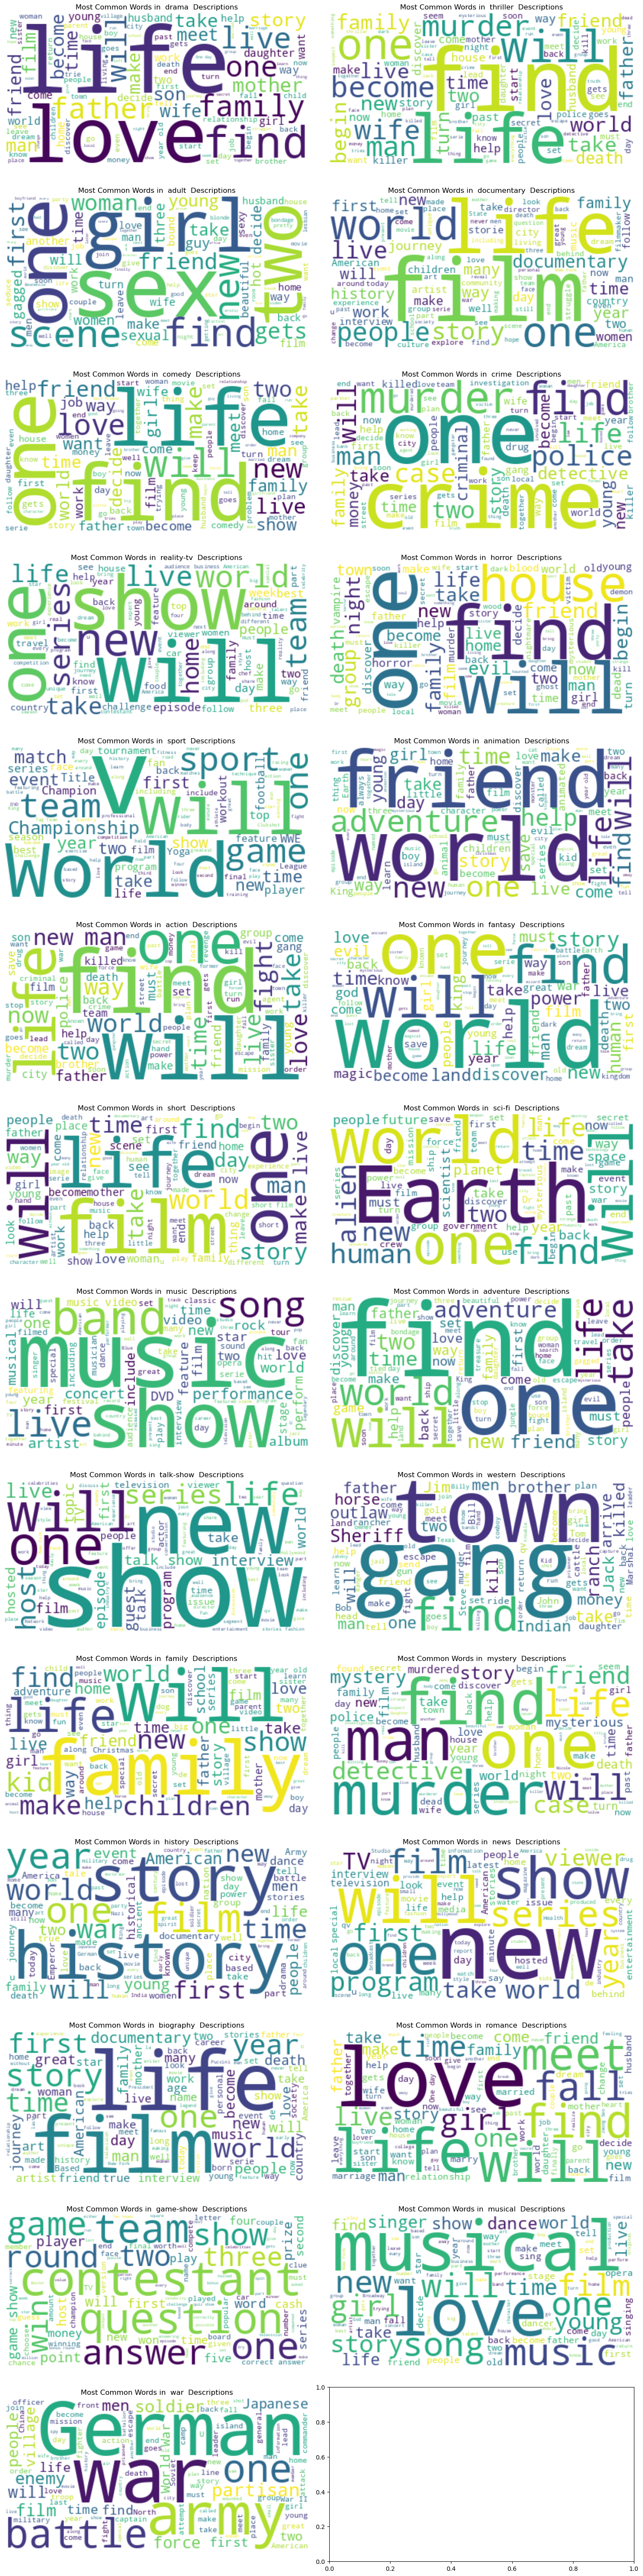

Validation Accuracy: 0.5670939776814534
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.34      0.38       263
           1       0.68      0.46      0.55       112
           2       0.38      0.24      0.29       139
           3       0.37      0.17      0.24       104
           4       0.00      0.00      0.00        61
           5       0.52      0.57      0.54      1443
           6       0.23      0.07      0.11       107
           7       0.69      0.79      0.74      2659
           8       0.56      0.69      0.62      2697
           9       0.30      0.15      0.20       150
          10       0.13      0.03      0.04        74
          11       0.76      0.65      0.70        40
          12       0.00      0.00      0.00        45
          13       0.62      0.64      0.63       431
          14       0.55      0.53      0.54       144
          15       0.12      0.02      0.03        50
      

/Users/ashishkishore/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ashishkishore/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ashishkishore/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.06      0.11      1314
           1       0.55      0.05      0.10       590
           2       0.82      0.07      0.14       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.53      0.43      0.48      7446
           6       0.00      0.00      0.00       505
           7       0.57      0.88      0.69     13096
           8       0.46      0.84      0.59     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.97      0.19      0.31       193
          12       0.00      0.00      0.00       243
          13       0.73      0.31      0.43      2204
          14       0.95      0.05      0.10       731
          15       0.00      0.00      0.00       276
          16       0.00      0.00      0.00  

/Users/ashishkishore/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ashishkishore/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ashishkishore/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Load data
train_df = pd.read_csv("/Users/ashishkishore/Downloads/Genre Classification Dataset/train_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python')
test_df = pd.read_csv("/Users/ashishkishore/Downloads/Genre Classification Dataset/test_data.txt", sep=':::', names=['ID', 'TITLE', 'DESCRIPTION'], engine='python')
test_solution_df = pd.read_csv("/Users/ashishkishore/Downloads/Genre Classification Dataset/test_data_solution.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python')

# Visualizations
plt.figure(figsize=(15, 8))
sns.countplot(y=train_df['GENRE'], order=train_df['GENRE'].value_counts().index)
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

top_genres = train_df['GENRE'].value_counts().head(10)
plt.figure(figsize=(15, 7))
top_genres.plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.gca().invert_yaxis()
plt.show()

train_df['description_length'] = train_df['DESCRIPTION'].apply(len)
plt.figure(figsize=(15, 8))
sns.histplot(train_df['description_length'], bins=50, kde=True)
plt.title('Distribution of Description Length')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(x='GENRE', y='description_length', data=train_df)
plt.title('Description Length by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Description Length')
plt.show()

# Tokenize and plot most frequent words
words = ' '.join(train_df['DESCRIPTION']).lower()
tokenized_words = words.split()
word_freq = Counter(tokenized_words)
top_words = word_freq.most_common(20)
top_words_words = [word[0] for word in top_words]
top_words_freq = [word[1] for word in top_words]

plt.figure(figsize=(15, 10))
sns.barplot(x=top_words_words, y=top_words_freq)
plt.xticks(rotation=45)
plt.title('Top 20 Most Frequent Words in Descriptions')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# MultiLabelBinarizer for genre correlation heatmap
train_df['GENRE_list'] = train_df['GENRE'].str.split(',')
mlb = MultiLabelBinarizer()
genres_binarized = pd.DataFrame(mlb.fit_transform(train_df['GENRE_list']), columns=mlb.classes_)
correlation = genres_binarized.corr()

plt.figure(figsize=(25, 15))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Genre Correlation Heatmap')
plt.show()

# Sentiment analysis
genre_counts = train_df['GENRE'].value_counts()
train_df['polarity'] = train_df['DESCRIPTION'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(15,10))
sns.boxplot(data=train_df, x='GENRE', y='polarity')
plt.xticks(rotation=45)
plt.title('Sentiment Distribution by Genre')
plt.show()

plt.figure(figsize=(20, 15))
plt.pie(genre_counts, labels=genre_counts.index, startangle=140, autopct='%1.1f%%', wedgeprops=dict(width=0.3))
plt.title('Distribution of Genres')
plt.show()

# WordCloud for all descriptions
text = ' '.join(description for description in train_df['DESCRIPTION'])
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most common words in movie descriptions')
plt.show()

# WordCloud by genre
genres = train_df['GENRE'].unique()
n_rows = 14
n_cols = 2
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 60))

for i, genre in enumerate(genres, start=1):
    plt.subplot(n_rows, n_cols, i)
    genre_text = ' '.join(description for description in train_df[train_df['GENRE'] == genre]['DESCRIPTION'])
    wordcloud = WordCloud(background_color="white", width=400, height=200, max_words=100).generate(genre_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Common Words in {genre} Descriptions')

plt.tight_layout()
plt.show()

# Handle missing values
train_df['DESCRIPTION'].fillna("", inplace=True)
test_df['DESCRIPTION'].fillna("", inplace=True)

# Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train = tfidf_vectorizer.fit_transform(train_df['DESCRIPTION'])
X_test = tfidf_vectorizer.transform(test_df['DESCRIPTION'])

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df['GENRE'])
y_test = label_encoder.transform(test_solution_df['GENRE'])

# Split training data into train and validation subsets
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train classifiers
clf = LinearSVC()
clf.fit(X_train_sub, y_train_sub)
y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

y_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

def predict_genre(description):
    vec = tfidf_vectorizer.transform([description])
    pred_label = clf.predict(vec)
    return label_encoder.inverse_transform(pred_label)[0]

sample_description = "A group of interstellar outlaws team up to save the galaxy from a villain who seeks ultimate power."
print(predict_genre(sample_description))

sample_descr_for_movie = "A movie where police chases the criminal and shoots him."
print(predict_genre(sample_descr_for_movie))

sample_descr_for_movie1 = "A movie where a person chases a girl to marry her but she refuses."
print(predict_genre(sample_descr_for_movie1))


In [11]:
# Import the required libraries
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Assuming X_train, X_test, y_train, y_test are already prepared through vectorization and label encoding
# If not, ensure to run data preparation before training the models

# Train LinearSVC model
clf = LinearSVC()
clf.fit(X_train, y_train)  # Ensure X_train and y_train are defined
y_pred_svc = clf.predict(X_test)
print("Linear SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Linear SVC Classification Report:\n", classification_report(y_test, y_pred_svc))

# Train Multinomial Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# Train Logistic Regression model
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))


Linear SVC Accuracy: 0.5737269372693727
Linear SVC Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.33      0.37      1314
           1       0.56      0.40      0.47       590
           2       0.41      0.21      0.28       775
           3       0.32      0.15      0.21       498
           4       0.00      0.00      0.00       264
           5       0.53      0.57      0.55      7446
           6       0.22      0.07      0.11       505
           7       0.69      0.81      0.75     13096
           8       0.57      0.70      0.63     13612
           9       0.32      0.15      0.20       783
          10       0.25      0.08      0.12       322
          11       0.75      0.61      0.67       193
          12       0.13      0.02      0.03       243
          13       0.60      0.61      0.61      2204
          14       0.60      0.50      0.55       731
          15       0.31      0.08      0.12       276
      

/Users/ashishkishore/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ashishkishore/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ashishkishore/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.06      0.11      1314
           1       0.55      0.05      0.10       590
           2       0.82      0.07      0.14       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.53      0.43      0.48      7446
           6       0.00      0.00      0.00       505
           7       0.57      0.88      0.69     13096
           8       0.46      0.84      0.59     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.97      0.19      0.31       193
          12       0.00      0.00      0.00       243
          13       0.73      0.31      0.43      2204
          14       0.95      0.05      0.10       731
          15       0.00      0.00      0.00       276
          16       0.00      0.00      0.00  

/Users/ashishkishore/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ashishkishore/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.29      0.37      1314
           1       0.62      0.24      0.35       590
           2       0.64      0.16      0.26       775
           3       0.55      0.05      0.09       498
           4       0.00      0.00      0.00       264
           5       0.54      0.59      0.56      7446
           6       0.38      0.03      0.06       505
           7       0.67      0.86      0.75     13096
           8       0.54      0.78      0.64     13612
           9       0.53      0.10      0.16       783
          10       0.55      0.04      0.07       322
          11       0.91      0.49      0.64       193
          12       0.00      0.00      0.00       243
          13       0.66      0.58      0.62      2204
          14       0.69      0.44      0.54       731
          15       0.44      0.01      0.03       276
          16       0.22      0.01    

/Users/ashishkishore/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
# Import joblib for saving models
import joblib

# Save LinearSVC model
svc_model_path = "/Users/ashishkishore/Downloads/Task-1/linear_svc_model.joblib"
joblib.dump(clf, svc_model_path)
print(f"Linear SVC model saved to {svc_model_path}")

# Save Multinomial Naive Bayes model
nb_model_path = "/Users/ashishkishore/Downloads/Task-1/naive_bayes_model.joblib"
joblib.dump(nb_classifier, nb_model_path)
print(f"Naive Bayes model saved to {nb_model_path}")

# Save Logistic Regression model
lr_model_path = "/Users/ashishkishore/Downloads/Task-1/logistic_regression_model.joblib"
joblib.dump(lr_classifier, lr_model_path)
print(f"Logistic Regression model saved to {lr_model_path}")


Linear SVC model saved to /Users/ashishkishore/Downloads/Task-1/linear_svc_model.joblib
Naive Bayes model saved to /Users/ashishkishore/Downloads/Task-1/naive_bayes_model.joblib
Logistic Regression model saved to /Users/ashishkishore/Downloads/Task-1/logistic_regression_model.joblib
